# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
import numpy as np
import torch

from unityagents import UnityEnvironment
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment! Before running the code cell below, change the file_name parameter to match the location of the Unity environment that you downloaded.

- **Mac**: "path/to/Tennis.app"
- **Windows** (x86): "path/to/Tennis_Windows_x86/Tennis.exe"
- **Windows** (x86_64): "path/to/Tennis_Windows_x86_64/Tennis.exe"- 
- **Linux** (x86): "path/to/Tennis_Linux/Tennis.x86"
- **Linux** (x86_64): "path/to/Tennis_Linux/Tennis.x86_64"
- **Linux** (x86, headless): "path/to/Tennis_Linux_NoVis/Tennis.x86"
- **Linux** (x86_64, headless): "path/to/Tennis_Linux_NoVis/Tennis.x86_64"

For instance, if you are using a Mac, then you downloaded Tennis.app. If this file is in the same folder as the notebook, then the line below should appear as follows:

env = UnityEnvironment(file_name="Tennis.app")

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


## 3. Take Random Actions in the Environment
In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step. A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


In [7]:
from ddpg_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

Episode 50	Average Score: 0.00	Score: -0.005
Episode 100	Average Score: 0.00	Score: -0.005
Episode 150	Average Score: 0.00	Score: -0.005
Episode 200	Average Score: 0.00	Score: -0.005
Episode 250	Average Score: 0.00	Score: -0.005
Episode 300	Average Score: 0.00	Score: -0.005
Episode 350	Average Score: 0.00	Score: -0.005
Episode 400	Average Score: 0.00	Score: -0.005
Episode 450	Average Score: 0.00	Score: -0.005
Episode 500	Average Score: 0.00	Score: -0.005
Episode 550	Average Score: 0.00	Score: -0.005
Episode 600	Average Score: 0.00	Score: -0.005
Episode 650	Average Score: 0.02	Score: -0.005
Episode 700	Average Score: 0.02	Score: -0.005
Episode 750	Average Score: 0.02	Score: 0.0455
Episode 800	Average Score: 0.03	Score: 0.0455
Episode 850	Average Score: 0.04	Score: -0.005
Episode 900	Average Score: 0.04	Score: -0.005
Episode 950	Average Score: 0.06	Score: 0.0455
Episode 1000	Average Score: 0.07	Score: 0.045
Episode 1050	Average Score: 0.09	Score: -0.005
Episode 1100	Average Score: 0.11	S

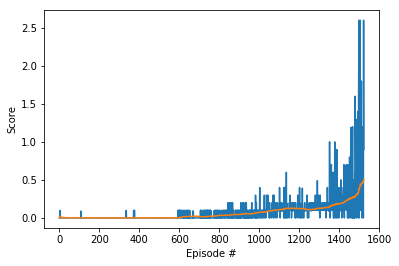

In [9]:
def ddpg(n_episodes=5000, max_t=1000):
    scores = []
    avg_score_list = []
    scores_deque = deque(maxlen=100)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(state, action, rewards, next_state, dones)
            state = next_state
            score += rewards
            if np.any(dones):
                break 
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        avg_score = np.mean(scores_deque)
        avg_score_list.append(avg_score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.3f}'.\
              format(i_episode, avg_score, np.mean(score)), end="")
        if i_episode % 50 == 0 or avg_score > 0.5:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')  

            if avg_score > 0.5:
                print('\nEnvironment solved in {:d} episodes!'.format(i_episode))
                break
                
    return scores, avg_score_list

scores, avg_score_list = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(avg_score_list)+1), avg_score_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()